# Assignment 4
---

## Introduction

In many cities across the world, you will be able to find some sort of rental bike service. These services allow individuals to use designated bikes, free of charge or else at a minimal rate, before returning them to stations owned by the service that are located around the city. From improved transportation connections to a cleaner environment, these systems offer many benefits to all those in and around the city and this has led to a constant increase in users (Section 1 Ref [1]). Therefore, as demand grows, it is natural that these services and cities would want to be able to predict how many bikes they need to offer at a certain time and to achieve this, I will use machine learning techniques, namely Linear and Decision Tree Regression models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

To begin with, however, I read the data from the SeoulBikeData_mod csv file into a dataframe called SeoulBikeData and then created the table below containing all the key information about the data. 

In [2]:
SeoulBikeData = pd.read_csv("SeoulBikeData_mod.csv") 

In [3]:
SeoulBikeData.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,665.802607,11.522512,9.476967,54.729147,1.883886,1342.977725,-0.066256,0.606507,0.097275,0.061280,3.492417
std,652.252686,6.930339,11.186973,20.994968,1.084647,622.576774,12.440532,0.910329,0.962272,0.348964,1.723804
min,20.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,177.000000,6.000000,1.100000,38.000000,1.000000,770.750000,-9.800000,0.000000,0.000000,0.000000,2.000000
50%,397.000000,12.000000,10.000000,53.000000,1.700000,1495.000000,0.600000,0.020000,0.000000,0.000000,3.000000
75%,1020.250000,18.000000,19.100000,70.000000,2.600000,1972.000000,10.425000,0.992500,0.000000,0.000000,5.000000
max,3556.000000,23.000000,32.700000,98.000000,7.400000,2000.000000,24.100000,3.520000,35.000000,4.100000,6.000000


I then extracted only the information from the 'Rented Bike Count' column and made a histogram and boxplot using this data. Both graphs use the same x-axis and so can be compared more easily. (See Fig 3 Ref[1])

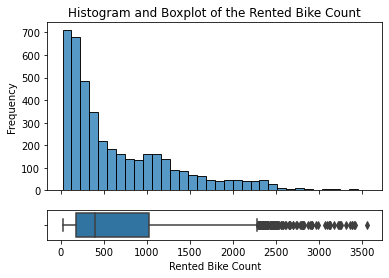

In [4]:
y = SeoulBikeData['Rented Bike Count']
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})
sns.boxplot(x=y, ax=ax_box)
sns.histplot(x=y, ax=ax_hist)
ax_box.set(xlabel='Rented Bike Count')
ax_hist.set(ylabel='Frequency')
ax_hist.set(title='Histogram and Boxplot of the Rented Bike Count')
plt.show()

I was interested to observe the Rented Bike Count at different points in the year. I used data from January (Month 1), March (Month 3) and June (Month 6) as this would give me a spread of the seasons (Winter, Spring and Summer). Note that only 6 months worth of data were in the file. I then made violinplots of the data. 

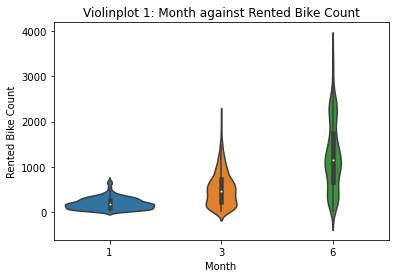

In [5]:
mask = np.in1d(SeoulBikeData['Month'].values, [1,3,6])
v = SeoulBikeData[mask]
fontsize = 10
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(x='Month',y='Rented Bike Count', data=v, ax = axes)
axes.set_title('Violinplot 1: Month against Rented Bike Count')
axes.set_xlabel('Month')
axes.set_ylabel('Rented Bike Count')
plt.show()


If we look at the median value for each violinplot (the white dot) we can see a steady increase in the number of rented bikes. This would make sense since in better weather, more people will want to ride. However, the distributions of each of the months are particularly interesting. January (Month 1) has a very tight distribution meaning roughly the same number of people used the rental service throughout the month but if we look at June (Month 6), there is a massive spread of the number of people using the bikes. This is probably due to changing weather. During January, it is Winter in Seoul and so the weather will be consistently poor but those that do use the service in this weather will likely use it consistently throughout the entire month. In June, however, Seoul is not only entering its Summer but also its Monsoon season and so for the days of sunshine when the number of people using rental bikes peaks, you will also have days of torrential rain when the uptake of rental bikes will be at a minimum. Of course, these data are specific to Seoul and South Korea and so this should be taken into account when applying the findings to other parts of the world (the Southern-Hemisphere for example).

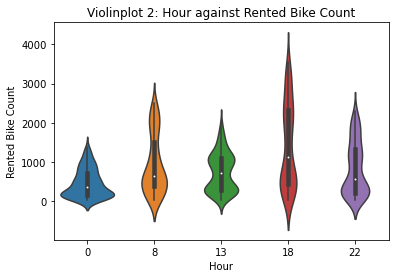

In [6]:
mask2 = np.in1d(SeoulBikeData['Hour'].values, [0,8,13,18,22])
v2 = SeoulBikeData[mask2]
fontsize = 10
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot(x='Hour',y='Rented Bike Count', data=v2, ax = axes)
axes.set_title('Violinplot 2: Hour against Rented Bike Count')
axes.set_xlabel('Hour')
axes.set_ylabel('Rented Bike Count')
plt.show()

I then created a similar plot for different times during the day (see above). I deliberately chose a range of times throughout the day to show the spread of bike usage. As you can see there are two main peaks, one at 08:00 and the other at 18:00; these correspond to people going home/to work (rush hour) and as with the plots above, it could be the Monsoon season that leads to the large spread of the data as people do not really want to cycle to work in the rain. Further, if we observe the median values, we see there is an increase in the numberof bikes used between 08:00 and 18:00 and so cities would potentially want to increase the amount of bikes they offer as the day progresses. More interesting, however, is the fact that at 22:00, there is a large spread of the data. It would appear due to the low median and the "bulge" at the lower part of the 22:00 violinplot, that normally this is a fairly quiet time but on certain days there is a significant increase in uptake (national holidays/good weather during the summer months). If companies could work out when these are, they could increase the number of bikes and potentially profit from this. 

---
## The Linear Regression Model

Below, I split the SeoulBikeData into two sections: one 4220 x 10 matrix containing all the data except the Rented Bike Count and then a column vector containing only the Rented Bike count (with 4220 entries). I then split these so that 25% of the data were for testing and 75% were for training. This is the split that the researchers chose in the paper (Section 4.2 [1]). 

I then conducted the Linear Regression Model on the training data before applying this to the testing data to predict the Rented Bike Count for these data values. I then formed the residual by finding the difference between the predicted and actual Rented Bike Count for these data values.

In [7]:
X = SeoulBikeData.drop(['Rented Bike Count'], axis =1)
y = SeoulBikeData['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state =42)


In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)
print("This is my code telling me I've conducted the Linear Regression Model")

This is my code telling me I've conducted the Linear Regression Model


In [9]:
# Use the model to predict the test data
y_pred = regr.predict(X_test)
resid = y_test - y_pred

Using the residual, I calculated the Root-Mean Squared, the Mean Absolute Error and the $R^2$ score, which you can see the values of below:

In [10]:
RMSE = np.sqrt(np.mean(resid**2))
print("The Root-Mean Squared is", RMSE)
MAE = np.mean(np.abs(resid))
print("The Mean Absolute Error is", MAE)
R2 = r2_score(y_test, y_pred)
print("R squared is", R2)

The Root-Mean Squared is 388.57937286447935
The Mean Absolute Error is 288.05790113914395
R squared is 0.6256068420172696


These values are a little different to the top, right of Table 4 of Ref. [1] which is because my data set is a modified version of the one they used. In fact, due to this change in data, this model is slightly better as shown by the higher $R^2$ score (their $R^2$ score was around 0.55).  

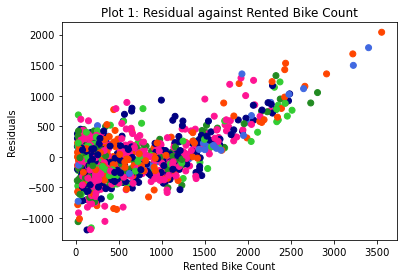

In [11]:

month=[]

for i in range(0, len(y_test)):
    month.append(SeoulBikeData['Month'].loc[y_test.iloc[i]])
    
def func(x):
    if x == 1:
        colour.append('deeppink')
    if x == 2:
        colour.append('navy')
    if x == 3:
        colour.append('orangered')
    if x == 4:
        colour.append('limegreen')
    if x == 5:
        colour.append('forestgreen')
    if x == 6:
        colour.append('royalblue')

colour = []
for j in range(0, len(month)):
      func(month[j])      
plt.scatter( y_test, resid , c=colour)
plt.ylabel("Residuals")
plt.xlabel("Rented Bike Count")
plt.title("Plot 1: Residual against Rented Bike Count")
plt.show()

Above is a scatter plot of the Residual as a function of the actual Rented Bike Count using a different colour for each month. To achieve this, I went through each value of Rented Bike Count in the test set and went into the SeoulBikeData dataframe to find the month associated with this value and put the number of this month into an array called 'month'. I then defined a function that would return a set colour based on the number entered (i.e. if 3 (eg March) is entered, it would return "orangered"). Using this function, I went through the 'month' array and added the colour returned to a new array called 'colour'. I then set this as my colouring for the plot. 

From this graph we can see that for Rented Bike Count values between 500 and 1500, the model is relatively accurate since the Residuals stay close to 0. However, for extreme values (both high and low) the model does not do so well with some Residuals being over 1500. Further, we can see that as the Rented Bike Count increases, the Residual also increases which could be due to a lack of data for these larger values and so the model does not accurately predict them.

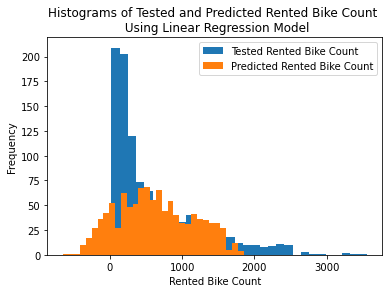

In [12]:
plt.hist(y_test, bins=31, label="Tested Rented Bike Count")
plt.hist(y_pred, bins=31, label="Predicted Rented Bike Count")
plt.ylabel("Frequency")
plt.xlabel("Rented Bike Count")
plt.title("Histograms of Tested and Predicted Rented Bike Count \n Using Linear Regression Model")
plt.legend(prop={'size': 10})
plt.show()

Above we see two histograms of the Rented Bike Count, one using the actual data, the other using the predicted results. Again we see that the model fits the data relatively well for values between 500 and 1500 since the histograms a relatively similar. However, we can clearly see that the model has some issues. The biggest is that it has negative values which should not be the case and we also have that above 2000 there are very few, if any, values predicted from the model, again probably due to the lack of these larger values.  

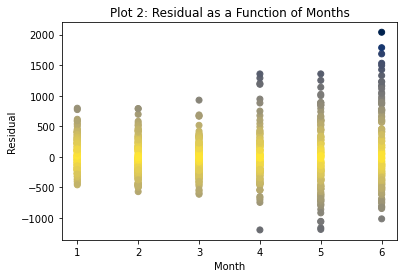

In [13]:
c1 = -np.abs(resid)
plt.scatter( X_test['Month'], resid , c=c1, cmap = 'cividis')
plt.ylabel("Residual")
plt.xlabel("Month")
plt.title("Plot 2: Residual as a Function of Months")
plt.show()

Above is a plot the Residual as a function of Month. A colourmap is used to indicate the absolute value of the residue. Here, we can definitely see what has happened with our model. For the early months, when the Rented Bike Count is relatively tightly distributed (see Violinplot 1), the Residuals are fairly low and the model fits well. However by the Summer months, when we have a large spread of data, including some extreme positive values (see Violinplot 1), we start seeing large Residuals and the model does not fit well. I think potentially what has happened is that because a large proportion of the data is within certain values (250 and 1500, see the IQR in the Boxplot in the first diagram), the model has focused itself to fit these and so fails to accurately model extreme values.

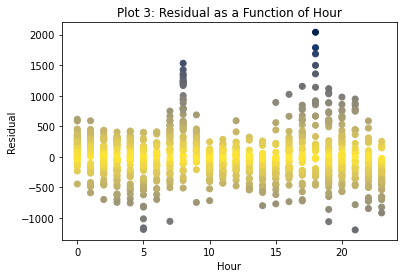

In [14]:
c2= -np.abs(resid)
plt.scatter( X_test['Hour'], resid , c=c2, cmap = 'cividis')
plt.ylabel("Residual")
plt.xlabel("Hour")
plt.title("Plot 3: Residual as a Function of Hour")
plt.show()

Above, we see a plot of the Residual as a function of Hour. Again we see that at points when extreme values occur (at rush hour periods, roughly 08:00 and 18:00), the model fails as shown by the large Residuals. However, there are only a few instances when this occurs and for the most part the model is predicts accurately.

## Conclusion


From what we has been discussed, the Linear Regression model is not overly accurate. The main indication for this is its low $R^2$ value ( $\approx$ 0.63), when compared to other models used by the researchers (see Table 4 of Ref. [1]) which had $R^2$ values around 0.9. We can see this through the various plots: the positive correlation between the Rented Bike Count and the Residual in Plot 1; the negative Rented Bike Count values as well as the lack of extreme positive values in the histogram ; the points in Plot 2 and 3 where the Residual is over 1500. However, that said, this model still could provide use to cities and companies during the Winter months when the numbers using the rented bikes are low but consistent as the model seems relatively accurate here. Despite this, during the Summer months this model will not be much use due to the extreme variation in the weather. This leads to a key point from the paper, since weather changes between regions, it is better to create models for individual districts rather than as countries as a whole (Section 7 Ref [1]). This links with what is discussed when assessing Violinplot 1 about the data being only for Seoul and cities from the Southern Hemisphere (and areas with totally different climates) will not find the results particularly useful. Overall, although this model accurately predicted a small section of values, as we can see from the paper, there are many other better ones available which would be of much more use for these services and cities. 

---

**Reference:** [1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

## Decision Tree Regressor:

Below I have attempted a Decision Tree Regressor model with a maximum depth of 6. The Root-Mean Squared, Mean Absolute Error and the $R^2$ score are given below:

In [15]:
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(X_train, y_train)
y_pred_1 = regr_1.predict(X_test)

In [16]:
resid_1 = y_test - y_pred_1
RMSE = np.sqrt(np.mean(resid_1**2))
print("The Root-Mean Squared is", RMSE)
MAE = np.mean(np.abs(resid_1))
print("The Mean Absolute Error is", MAE)
R2 = r2_score(y_test, y_pred)
print("R squared is", R2)

The Root-Mean Squared is 288.0219247550258
The Mean Absolute Error is 178.33042957994127
R squared is 0.6256068420172696


Although the $R^2$ score is similar to the Linear Regression model (which had $R^2 \approx$ 0.63), the Root-Mean Squared and Mean Absolute Error are much less meaning the model better fits the data (the Residual is less for more values of the test and predicted data using this model).

Below, are two histograms of the tested and predicted Rented Bike Counts. Although the frequencies do not quite match, the model much better predicts the overall shape of the data, including extreme values such as those over 2000.

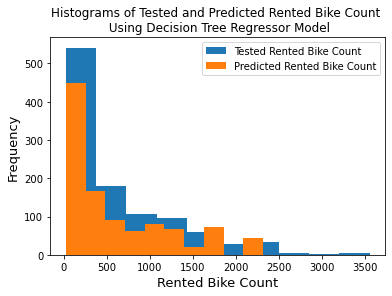

In [17]:
plt.hist(y_test, bins=10, label = "Tested Rented Bike Count")
plt.hist(y_pred_1, bins=10, label = "Predicted Rented Bike Count")
plt.title("Histograms of Tested and Predicted Rented Bike Count \n Using Decision Tree Regressor Model")
plt.legend(prop={'size': 10})
plt.xlabel("Rented Bike Count", size =13)
plt.ylabel("Frequency", size= 13)
plt.show()